# Kopi NangKau dengan [fill with your creativity]

## [DATASET.CSV](https://drive.google.com/file/d/1D1hdilPgi6nB8W3HAHnB1Jx87OJBScm8/view?usp=sharing)

In [1]:
!gdown 1D1hdilPgi6nB8W3HAHnB1Jx87OJBScm8

Downloading...
From: https://drive.google.com/uc?id=1D1hdilPgi6nB8W3HAHnB1Jx87OJBScm8
To: /content/penjualan_kopi_2021_2023.csv
100% 232k/232k [00:00<00:00, 67.1MB/s]


In [2]:
# Petunjuk/Hint

# Import library untuk komputasi numerik dan array (dasar dari Pandas).
# Docs: https://numpy.org/doc/
import numpy as np

# Import library untuk manipulasi dan analisis data tabular (DataFrame).
# Docs: https://pandas.pydata.org/docs/
import pandas as pd

# Import library fundamental untuk membuat visualisasi data (grafik, plot).
# Docs: https://matplotlib.org/stable/contents.html
import matplotlib.pyplot as plt

# Import library visualisasi data statistik yang dibangun di atas Matplotlib.
# Docs: https://seaborn.pydata.org/
import seaborn as sns

## **Skenario:**

Selamat! Kamu baru saja direkrut sebagai `Data Analyst` di `Kopi NangKau`. Kamu diberikan data penjualan harian dari tahun 2021 hingga 2023. Data ini berisi penjualan berbagai produk minuman dan makanan di toko, tapi terdapat data dobel (duplikat) dan beberapa nilai kosong (missing value).

Tugas kamu adalah membersihkan, mengolah, dan menganalisis data penjualan supaya bisnis bisa terus berkembang.

---

### 💡 Informasi Dasar Harga Produk

| Produk      | Harga Dasar Tahun 2021 (Rp) |
|-------------|----------------------------|
| Espresso    | 22.000                     |
| Latte       | 28.000                     |
| Cappuccino  | 25.000                     |
| Americano   | 21.000                     |
| Croissant   | 18.000                     |
| Donat       | 15.000                     |

- **Harga setiap produk naik 2% setiap tahun**  
  Contoh: Jika harga awal Espresso 22.000 di 2021, maka di 2023:  
  Tahun 2022 → 22.000 × 1.02 = 22.440  
  Tahun 2023 → 22.000 × 1.04 = 22.880 (pembulatan ke bawah karena integer di kode)

---
## TUGAS 1: Eksplorasi Data

1. Baca dataset ke pandas DataFrame.
2. Tampilkan 10 baris pertama.
3. Hitung jumlah baris, kolom, baris duplikat, serta missing value per kolom.
4. Pastikan Kolom Unit_Terjual dan Harga_Per_Unit

In [ ]:
df = pd.read_csv('penjualan_kopi_2021_2023.csv', sep=';')
print(df.head(10))

   Tahun    Bulan  Tanggal      Produk  Unit_Terjual  Harga_Per_Unit
0   2021  Januari        1   Americano          52.0         21000.0
1   2021  Januari        1  Cappuccino          45.0             NaN
2   2021  Januari        1   Croissant          20.0             NaN
3   2021  Januari        1       Donat          20.0         15000.0
4   2021  Januari        1    Espresso          43.0         22000.0
5   2021  Januari        1       Latte          38.0         28000.0
6   2021  Januari        2   Americano          44.0         21000.0
7   2021  Januari        2  Cappuccino          36.0             NaN
8   2021  Januari        2   Croissant          18.0         18000.0
9   2021  Januari        2   Croissant          18.0         18000.0


Menghitung jumlah baris, kolom, baris duplikat dan missing value per kolom

In [ ]:
print("Jumlah baris:", df.shape[0])
print("Jumlah kolom:", df.shape[1])
print("Jumlah baris duplikat:", df.duplicated().sum(), "\n")
print("Jumlah missing value per kolom:")
print(df.isnull().sum())

Jumlah baris: 6600
Jumlah kolom: 6
Jumlah baris duplikat: 19 

Jumlah missing value per kolom:
Tahun               0
Bulan               0
Tanggal             0
Produk            500
Unit_Terjual      500
Harga_Per_Unit    500
dtype: int64


Mengisi value data pada missing value di kolom Unit_Terjual dan Harga_Per_Unit

In [ ]:
df['Harga_Per_Unit'] = df['Harga_Per_Unit'].fillna(df['Harga_Per_Unit'].median())
df['Unit_Terjual'] = df['Unit_Terjual'].fillna(df['Unit_Terjual'].median())
print(df.isnull().sum())

Tahun               0
Bulan               0
Tanggal             0
Produk            500
Unit_Terjual        0
Harga_Per_Unit      0
dtype: int64



---

## TUGAS 2: Data Cleaning & Imputasi

1. Untuk baris di mana **Produk kosong tapi Harga_Per_Unit ada**:  
   - Lengkapi nilai Produk dengan cara mencocokkan harga dan tahun pada daftar harga.
2. Untuk baris di mana **Harga_Per_Unit kosong tapi Produk ada**:  
   - Lengkapi Harga_Per_Unit berdasar produk dan tahun (lihat tabel harga & rumus kenaikan).
3. Untuk baris dengan **Produk & Harga_Per_Unit sama-sama kosong**, hapus baris tersebut.
4. Untuk **Unit_Terjual** yang kosong, langsung hapus baris.
5. Pastikan tidak ada nilai negatif di Unit_Terjual.
6. Hapus baris duplikat.

In [ ]:
# Dictionary harga 2021
base_prices_2021 = {
    'Espresso': 22000,
    'Latte': 28000,
    'Cappuccino': 25000,
    'Americano': 21000,
    'Croissant': 18000,
    'Donat': 15000
}

# Kalkulasi harga setiap tahun
def calculate_price(year, base_price):
    if year == 2021:
        return base_price
    elif year == 2022:
        return int(base_price * 1.02)
    elif year == 2023:
        return int(base_price * 1.04)
    return None

# Fungsi menemukan produk berdasarkan harga dan tahun
def find_product_by_price(price, year):
    for product, base_price in base_prices_2021.items():
        calculated_price = calculate_price(year, base_price)
        if calculated_price == price:
            return product
    return None

df_cleaned = df.copy()

# 1
for index, row in df_cleaned.iterrows():
    if pd.isnull(row['Produk']) and not pd.isnull(row['Harga_Per_Unit']):
        year = row['Tahun']
        price = row['Harga_Per_Unit']
        df_cleaned.loc[index, 'Produk'] = find_product_by_price(price, year)

# 2
for index, row in df_cleaned.iterrows():
    if not pd.isnull(row['Produk']) and pd.isnull(row['Harga_Per_Unit']):
        year = row['Tahun']
        product = row['Produk']
        if product in base_prices_2021:
            df_cleaned.loc[index, 'Harga_Per_Unit'] = calculate_price(year, base_prices_2021[product])

# 3
df_cleaned.dropna(subset=['Produk', 'Harga_Per_Unit'], how='all', inplace=True)

# 4
df_cleaned.dropna(subset=['Unit_Terjual'], inplace=True)

# 5
df_cleaned = df_cleaned[df_cleaned['Unit_Terjual'] >= 0]

# 6
df_cleaned.drop_duplicates(inplace=True)

# Update
df = df_cleaned

print("After cleaning and imputation:")
print("Jumlah baris:", df.shape[0])
print("Jumlah kolom:", df.shape[1])
print("Jumlah baris duplikat:", df.duplicated().sum(), "\n")
print("Jumlah missing value per kolom:")
print(df.isnull().sum())

After cleaning and imputation:
Jumlah baris: 6579
Jumlah kolom: 6
Jumlah baris duplikat: 0 

Jumlah missing value per kolom:
Tahun              0
Bulan              0
Tanggal            0
Produk            28
Unit_Terjual       0
Harga_Per_Unit     0
dtype: int64




---


## TUGAS 3: Feature Engineering

1. Buat kolom baru "Pendapatan".
2. Buat kolom "Tanggal_Penjualan" dengan format datetime.

In [ ]:
# Buat kolom baru "Pendapatan"
df['Pendapatan'] = df['Unit_Terjual'] * df['Harga_Per_Unit']

# Buat kolom "Tanggal_Penjualan" dengan format datetime
df['Tanggal_String'] = df['Tahun'].astype(str) + '-' + df['Bulan'] + '-' + df['Tanggal'].astype(str)

month_mapping = {
    'Januari': '01', 'Februari': '02', 'Maret': '03', 'April': '04', 'Mei': '05', 'Juni': '06',
    'Juli': '07', 'Agustus': '08', 'September': '09', 'Oktober': '10', 'November': '11', 'Desember': '12'
}

df['Bulan_Numerik'] = df['Bulan'].map(month_mapping)
df['Tanggal_String'] = df['Tahun'].astype(str) + '-' + df['Bulan_Numerik'] + '-' + df['Tanggal'].astype(str)
df['Tanggal_Penjualan'] = pd.to_datetime(df['Tanggal_String'], format='%Y-%m-%d', errors='coerce')


df.drop(columns=['Tanggal_String', 'Bulan_Numerik'], inplace=True)

display(df.head())

,Tahun,Bulan,Tanggal,Produk,Unit_Terjual,Harga_Per_Unit,Pendapatan,Tanggal_Penjualan
0,2021,Januari,1,Americano,52.0,21000.0,1092000.0,2021-01-01
1,2021,Januari,1,Cappuccino,45.0,22000.0,990000.0,2021-01-01
2,2021,Januari,1,Croissant,20.0,22000.0,440000.0,2021-01-01
3,2021,Januari,1,Donat,20.0,15000.0,300000.0,2021-01-01
4,2021,Januari,1,Espresso,43.0,22000.0,946000.0,2021-01-01




---


## TUGAS 4: Analisis Grup & Visualisasi

1. Hitung total unit & pendapatan per produk.
2. Hitung rata-rata unit terjual per hari tiap produk pada tiap tahun.
3. Temukan produk terlaris per tahun.
4. Buat grafik batang total unit jual per produk (2021 - 2023).

Total unit & pendapatan per produk:


,Produk,Unit_Terjual,Pendapatan
0,Americano,42258.0,9.067615e+08
1,Cappuccino,42945.0,1.084175e+09
2,Croissant,24230.0,4.509680e+08
3,Donat,24728.0,3.932684e+08
4,Espresso,42971.0,9.630689e+08
5,Latte,42608.0,1.197267e+09



Rata-rata unit terjual per hari tiap produk pada tiap tahun:


,Tahun,Produk,Unit_Terjual
0,2021,Americano,39.695055
1,2021,Cappuccino,39.212121
2,2021,Croissant,22.521978
3,2021,Donat,22.752066
4,2021,Espresso,40.402740
5,2021,Latte,39.247253
6,2022,Americano,38.256906
7,2022,Cappuccino,39.333333
8,2022,Croissant,22.334262
9,2022,Donat,23.577348



Produk terlaris per tahun:


,Tahun,Produk,Unit_Terjual
4,2021,Espresso,14747.0
7,2022,Cappuccino,14278.0
13,2023,Cappuccino,14433.0


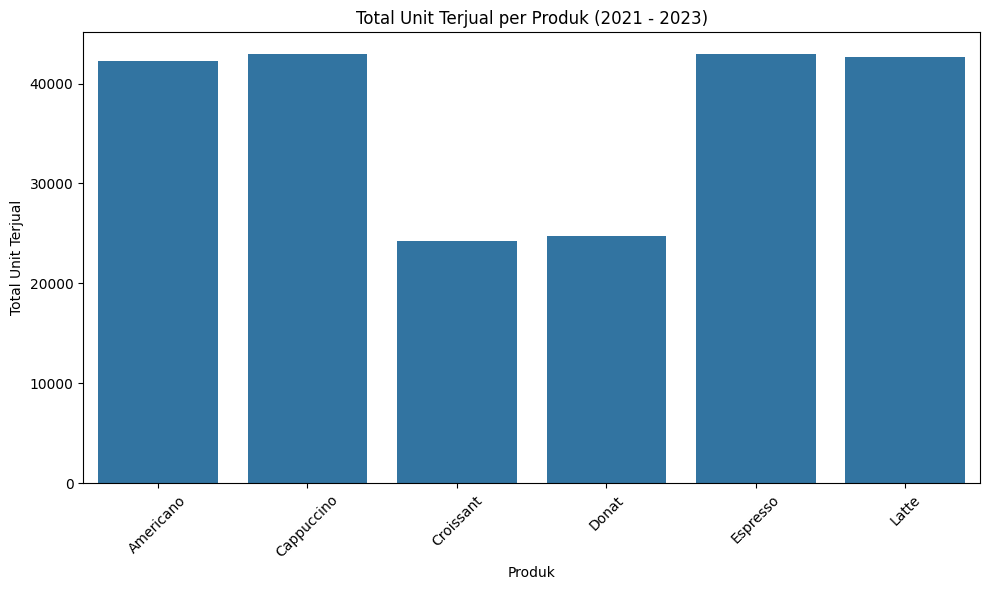

In [ ]:
# 1. Hitung total unit & pendapatan per produk.
product_summary = df.groupby('Produk').agg({
    'Unit_Terjual': 'sum',
    'Pendapatan': 'sum'
}).reset_index()
print("Total unit & pendapatan per produk:")
display(product_summary)

# 2. Hitung rata-rata unit terjual per hari tiap produk pada tiap tahun.
daily_sales = df.groupby(['Tahun', 'Produk', 'Tanggal_Penjualan']).agg({
    'Unit_Terjual': 'sum'
}).reset_index()

average_daily_sales = daily_sales.groupby(['Tahun', 'Produk']).agg({
    'Unit_Terjual': 'mean'
}).reset_index()
print("\nRata-rata unit terjual per hari tiap produk pada tiap tahun:")
display(average_daily_sales)


# 3. Temukan produk terlaris per tahun.
best_selling_product_per_year = df.groupby(['Tahun', 'Produk']).agg({
    'Unit_Terjual': 'sum'
}).reset_index()

best_selling_product_per_year = best_selling_product_per_year.loc[best_selling_product_per_year.groupby('Tahun')['Unit_Terjual'].idxmax()]
print("\nProduk terlaris per tahun:")
display(best_selling_product_per_year)


# 4. Buat grafik batang total unit jual per produk (2021 - 2023).
plt.figure(figsize=(10, 6))
sns.barplot(x='Produk', y='Unit_Terjual', data=product_summary)
plt.title('Total Unit Terjual per Produk (2021 - 2023)')
plt.xlabel('Produk')
plt.ylabel('Total Unit Terjual')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



---


## TUGAS 5: Rangkuman & Insight

- Tulis ringkasan hasil:
- Sampaikan minimal 2 rekomendasi untuk bisnis.

Ringkasan Hasil:

Total Unit & Pendapatan per Produk: Terlihat produk mana yang paling banyak terjual dan menghasilkan pendapatan tertinggi secara keseluruhan selama periode 3 tahun.
- (Lihat tabel product_summary) Rata-rata Unit Terjual per Hari per Produk per Tahun: Memberikan gambaran performa harian setiap produk di setiap tahun.
- (Lihat tabel average_daily_sales) Produk Terlaris per Tahun: Kita dapat melihat produk mana yang menjadi yang paling laris di setiap tahunnya. Espresso menjadi produk terlaris di tahun 2021, sementara Cappuccino menjadi produk terlaris di tahun 2022 dan 2023.
- (Lihat tabel best_selling_product_per_year) Grafik Batang Total Unit Terjual per Produk: Visualisasi ini menunjukkan perbandingan total unit terjual untuk setiap produk selama periode 2021-2023.
- Produk kopi (Americano, Cappuccino, Espresso, Latte) menunjukkan volume penjualan yang jauh lebih tinggi dibandingkan produk makanan (Croissant, Donat).

Rekomendasi untuk Bisnis:

1. Fokus pada Produk Terlaris: Berdasarkan temuan bahwa Cappuccino menjadi produk terlaris di tahun 2022 dan 2023, pertimbangkan untuk lebih mempromosikan produk ini atau menawarkan variasi baru dari Cappuccino. Selain itu, produk kopi secara umum memiliki volume penjualan yang tinggi, jadi menjaga kualitas dan ketersediaan produk-produk ini sangat penting.

2. Evaluasi Strategi Penjualan Produk Makanan: Produk makanan seperti Croissant dan Donat memiliki volume penjualan yang lebih rendah. Lakukan evaluasi mengapa hal ini terjadi. Apakah perlu ada promosi khusus untuk produk makanan? Apakah kualitasnya perlu ditingkatkan? Atau mungkin perluasan variasi produk makanan yang ditawarkan? Pertimbangkan juga analisis lebih lanjut seperti identifikasi waktu penjualan terbaik untuk produk makanan.

## 🌟 Tugas Opsional / Challenge (Pilihan):



1. **Identifikasi Bulan Tertinggi dan Terendah**
   
   - Temukan bulan dan tahun dengan total penjualan unit tertinggi dan terendah (dalam seluruh periode).
   - Visualisasikan trennya (misal line chart penjualan bulanan).

2. **Analisis Pertumbuhan Penjualan**
   
   - Bandingkan total penjualan (unit terjual maupun pendapatan) antar tahun 2021, 2022, dan 2023.
   - Produk apa yang pertumbuhannya paling tinggi selama 3 tahun?
   - Tampilkan hasilnya dalam bentuk tabel ringkasan pertumbuhan dan/atau visualisasi sederhana.

3. **Simulasi Promo Diskon**
   
   - Simulasikan jika ada diskon 10% untuk produk minuman di bulan-bulan tertentu (misal: Juli & Agustus), dan asumsikan penjualan produk-produk ini naik 15% di bulan promo.
   - Hitung dan bandingkan pendapatan asli vs pendapatan setelah promo.
   - Jelaskan insight-nya, apakah strategi promo ini efektif? (Boleh angka “kasar”, tidak harus persis.)

4. **Deteksi Outlier**
   
   - Temukan hari-hari/tanggal tertentu dimana penjualan produk “melonjak tidak wajar” (misal, tiga kali lipat dari median hariannya).
   - Buat list tanggal tersebut dan sebutkan produk apa saja yang menjadi “outlier”.
   - Akan lebih baik jika langsung ditampilkan dalam bentuk boxplot

5. **Cek Konsistensi Harga**
   
   - Adakah harga produk yang tidak sesuai aturan/rumus kenaikan 2% per tahun? (Cek kolom Harga_Per_Unit)
   - Jika ada data yang tidak konsisten, tampilkan semua kasusnya dan buat analisa ringkas.

---

**Instruksi untuk peserta (opsional):**
Pilih satu atau lebih tugas opsional di atas, lakukan analisis menggunakan pandas, groupby, serta visualisasi yang dikuasai. Laporan insight dan hasil analisis ditulis ringkas namun jelas.

---

Still hungry of challenge ?
[Try this dataset](https://drive.google.com/file/d/1XQDy8Li_EKcC1QOez1dtjKLguY_MyVOO/view?usp=drive_link)

# Tugas Opsional / Challenge (Pilihan):



1.   Identifikasi Bulan Tertinggi dan Terendah

- Temukan bulan dan tahun dengan total penjualan unit tertinggi dan terendah (dalam seluruh periode).
- Visualisasikan trennya (misal line chart penjualan bulanan).







Bulan dengan total penjualan unit tertinggi:


,19
Tahun,2022
Bulan,Maret
Bulan_Numerik,03
Unit_Terjual,6416.0
Tahun_Bulan,2022-03



Bulan dengan total penjualan unit terendah:


,15
Tahun,2022
Bulan,Februari
Bulan_Numerik,02
Unit_Terjual,5628.0
Tahun_Bulan,2022-02


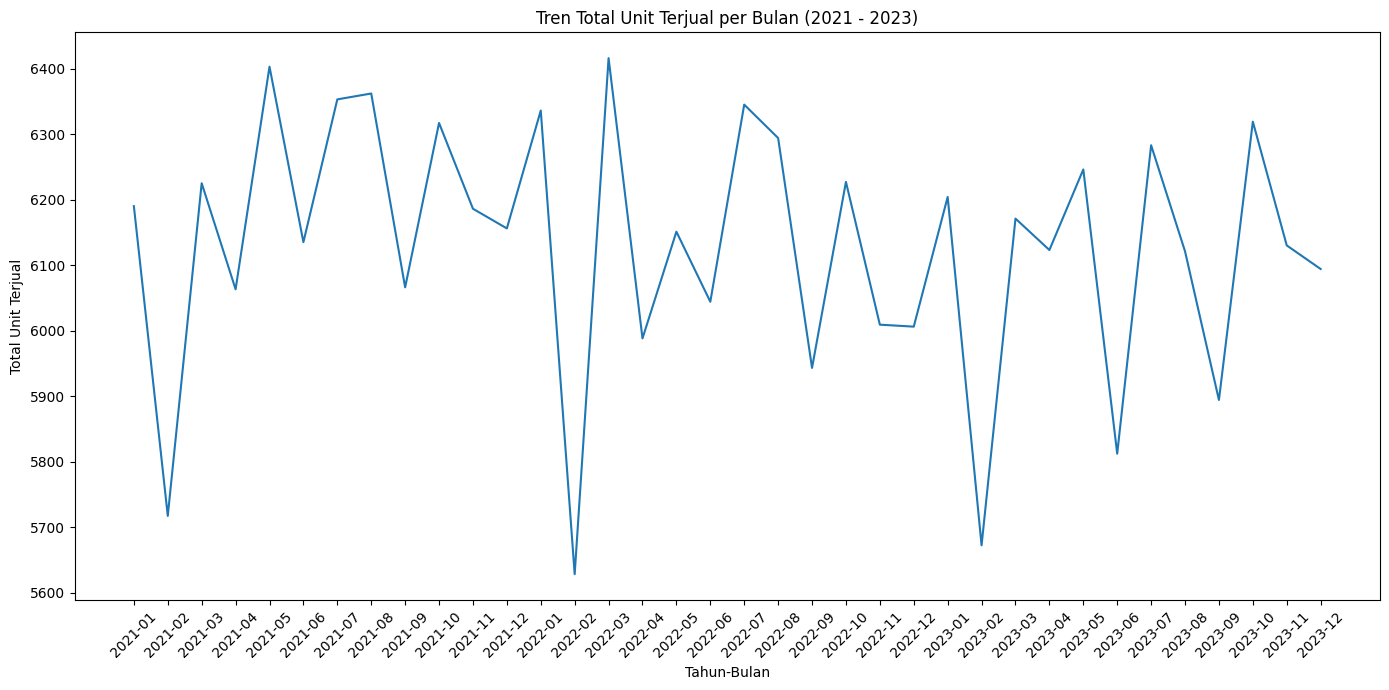

In [ ]:
# 1. Identifikasi Bulan Tertinggi dan Terendah
# =============================================
month_mapping = {
    'Januari': '01', 'Februari': '02', 'Maret': '03', 'April': '04', 'Mei': '05', 'Juni': '06',
    'Juli': '07', 'Agustus': '08', 'September': '09', 'Oktober': '10', 'November': '11', 'Desember': '12'
}
df['Bulan_Numerik'] = df['Bulan'].map(month_mapping)

# Kelompokkan berdasarkan tahun dan bulan, lalu jumlahkan unit terjual
monthly_sales = df.groupby(['Tahun', 'Bulan', 'Bulan_Numerik'])['Unit_Terjual'].sum().reset_index()

# Buat kolom gabungan tahun-bulan untuk keperluan visualisasi
monthly_sales['Tahun_Bulan'] = monthly_sales['Tahun'].astype(str) + '-' + monthly_sales['Bulan_Numerik']

# Urutkan berdasarkan kolom gabungan tahun-bulan agar grafik rapi
monthly_sales = monthly_sales.sort_values('Tahun_Bulan')

# Cari bulan dengan jumlah unit terjual tertinggi
highest_sales_month = monthly_sales.loc[monthly_sales['Unit_Terjual'].idxmax()]

# Cari bulan dengan jumlah unit terjual terendah
lowest_sales_month = monthly_sales.loc[monthly_sales['Unit_Terjual'].idxmin()]

print("Bulan dengan total penjualan unit tertinggi:")
display(highest_sales_month)

print("\nBulan dengan total penjualan unit terendah:")
display(lowest_sales_month)

# Visualisasikan tren penjualan unit per bulan
plt.figure(figsize=(14, 7))
sns.lineplot(x='Tahun_Bulan', y='Unit_Terjual', data=monthly_sales)
plt.title('Tren Total Unit Terjual per Bulan (2021 - 2023)')
plt.xlabel('Tahun-Bulan')
plt.ylabel('Total Unit Terjual')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()